In [10]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [2]:
print(len(train_data))
print(len(test_data))
print(train_data[0])

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [3]:
word_index=reuters.get_word_index()
#print(word_index)
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
#print(reverse_word_index)
decoded_newswire=' '.join([reverse_word_index.get(i) for i in train_data[0]])
print(decoded_newswire)

the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


In [4]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    result=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        result[i,sequence]=1
    return result

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
print(x_train[0])
print(len(x_train[0]))
print(len(x_train[5]))
print(len(x_train[9]))



[0. 1. 1. ... 0. 0. 0.]
10000
10000
10000


In [5]:
print(train_labels)

[ 3  4  3 ... 25  3 25]


In [6]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)
print(one_hot_test_labels[0])
print(len(one_hot_test_labels[0]))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
46


In [7]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [8]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [9]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 12s 329ms/step - loss: 3.2105 - accuracy: 0.3647 - val_loss: 1.7233 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 2s 127ms/step - loss: 1.5081 - accuracy: 0.7032 - val_loss: 1.2852 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 2s 123ms/step - loss: 1.1025 - accuracy: 0.7766 - val_loss: 1.1327 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 2s 120ms/step - loss: 0.8438 - accuracy: 0.8252 - val_loss: 1.0457 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 2s 112ms/step - loss: 0.6853 - accuracy: 0.8557 - val_loss: 0.9769 - val_accuracy: 0.8130
Epoch 6/20
16/16 [==============================] - 2s 117ms/step - loss: 0.5566 - accuracy: 0.8863 - val_loss: 0.9415 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 2s 139ms/step - loss: 0.4392 - accuracy: 0.9108 - val_loss: 0.9032 - val_accuracy: 0.8110
Epoch

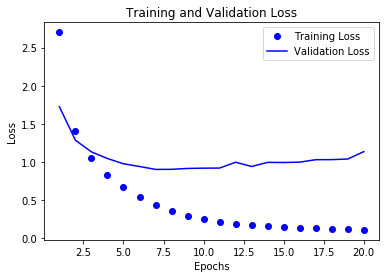

In [12]:
import matplotlib.pyplot as plt
history_dict=history.history
#print(history_dict)
acc=history_dict['accuracy']
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(acc)+1)
#print(epochs)
plt.plot(epochs,loss_values,'bo',label="Training Loss")
plt.plot(epochs,val_loss_values,'b',label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

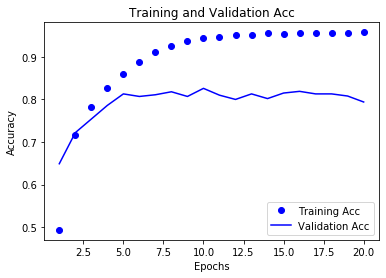

In [13]:
plt.clf()
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label='Validation Acc')
plt.title("Training and Validation Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
history=model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/10
16/16 [==============================] - 19s 730ms/step - loss: 0.0798 - accuracy: 0.9595 - val_loss: 1.4183 - val_accuracy: 0.7830
Epoch 2/10
16/16 [==============================] - 17s 1s/step - loss: 0.0800 - accuracy: 0.9595 - val_loss: 1.4598 - val_accuracy: 0.7830
Epoch 3/10
16/16 [==============================] - 11s 695ms/step - loss: 0.0781 - accuracy: 0.9582 - val_loss: 1.4548 - val_accuracy: 0.7690
Epoch 4/10
16/16 [==============================] - 12s 780ms/step - loss: 0.0819 - accuracy: 0.9559 - val_loss: 1.5056 - val_accuracy: 0.7640
Epoch 5/10
16/16 [==============================] - 11s 724ms/step - loss: 0.0791 - accuracy: 0.9583 - val_loss: 1.4239 - val_accuracy: 0.7790
Epoch 6/10
16/16 [==============================] - 9s 605ms/step - loss: 0.0763 - accuracy: 0.9593 - val_loss: 1.4855 - val_accuracy: 0.7790
Epoch 7/10
16/16 [==============================] - 10s 672ms/step - loss: 0.0792 - accuracy: 0.9593 - val_loss: 1.4563 - val_accuracy: 0.7760
Epo

In [14]:
predictions=model.predict(x_test)
print(predictions[0])
print(len(predictions[0]))
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))
print(test_labels[0])

[1.60445683e-08 3.65143052e-07 1.13570020e-09 9.99347389e-01
 6.04361063e-04 2.07380974e-10 6.36188255e-11 5.19565440e-08
 9.35005119e-07 1.04815767e-09 9.05193198e-10 1.18793014e-05
 1.47591992e-08 3.12770226e-07 2.28390888e-07 9.13095266e-10
 1.15029741e-06 1.45196291e-08 6.09860695e-09 1.60502759e-06
 3.01519412e-05 1.18276624e-07 8.29334879e-10 4.54962958e-07
 2.16037410e-09 4.09218570e-09 5.18268584e-09 2.35042435e-07
 2.26142888e-07 1.08780455e-07 8.91696033e-08 6.35780928e-10
 1.43632315e-08 1.79797581e-08 4.74148329e-08 3.25707517e-11
 2.34669514e-07 2.99590064e-09 3.40495028e-08 2.34722659e-08
 2.75626011e-09 4.20657429e-08 3.14201748e-10 1.11434521e-10
 1.82284365e-09 4.21871871e-10]
46
1.0000001
3
3
